In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: user 1.67 s, sys: 226 ms, total: 1.89 s
Wall time: 1.89 s


In [2]:
def plot_total_counts(data_annot, title):
    # Calculate total counts per sample
    total_counts = data_annot.drop(['plate', 'class'], axis=1).sum(axis=1)
    plot_df = pd.DataFrame({
        'total_counts': total_counts,
        'plate': data_annot['plate'],
        'class': data_annot['class']
    })
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='plate', y='total_counts', hue='class', data=plot_df, showfliers=False)
    plt.title(title)
    plt.ylabel('Total Counts per Sample')
    plt.xlabel('Plate')
    plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.decomposition import PCA

#def plot_pca(data_annot, manifest, title):
def plot_pca(data_annot, title, min=0.1, max=99.9, size=10):
    # Remove annotation columns
    X = data_annot.drop(['plate', 'class'], axis=1).values
    y = data_annot['class'].values
    plates = data_annot['plate'].values
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 6))

    # ignore 0.2% of the points in the plot (there is a single very, very stray point in the combat plot)
    x_min, x_max = np.percentile(X_pca[:, 0], [min, max])
    y_min, y_max = np.percentile(X_pca[:, 1], [min, max])
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, style=plates, s=80, palette='Set1')
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=20, palette='Set1')
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=size, palette='tab20')
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=size, palette='Set3') # not bad

    # Define a custom palette with 12 colors
    #custom_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 
    #             "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442"] # Example colors

    # https://mokole.com/palette.html
    custom_colors = [
        "#2f4f4f",
        "#228b22",
        "#7f0000",
        "#00008b",
        "#ff8c00",
        "#ffff00",
        "#00ff00",
        "#00ffff",
        "#ff00ff",
        "#1e90ff",
        "#eee8aa",
        "#ff69b4"
    ]
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=size, palette=custom_colors)
    
    if min != 0:
        plt.xlim(xmin=x_min)
        plt.ylim(ymin=y_min)
    if max != 100:
        plt.xlim(xmax=x_max)
        plt.ylim(ymax=y_max)

    #plt.xlim(x_min, x_max)
    #plt.ylim(y_min, y_max)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [4]:
#manifest = pd.read_csv('Counts.normalized.subtracted.csv', nrows=9, header=None).iloc[:, 2:].T.drop(columns=[2])
manifest = pd.read_csv('Counts.csv', nrows=9, header=None).iloc[:, 2:].T.drop(columns=[2])
manifest.columns = ['sample','subject','type','study','group','age','sex','plate']
#manifest['age'] = manifest['age'].astype(int) # _
manifest['plate'] = manifest['plate'].astype(int)
manifest['study'] = manifest['study'].str.replace(r'^Unname.*$', '', regex=True)
manifest['group'] = manifest['group'].str.replace(r'^Unname.*$', '', regex=True)
manifest['age'] = manifest['age'].str.replace(r'^Unname.*$', '', regex=True)
manifest['sex'] = manifest['sex'].str.replace(r'^Unname.*$', '', regex=True)
manifest = manifest.sort_values(by='plate')
manifest

,sample,subject,type,study,group,age,sex,plate
2,14078-01,14078-01,glioma serum,IPS,case,60,M,1
3,14078-01dup,14078-01,glioma serum,IPS,case,60,M,1
4,14118-01,14118-01,glioma serum,IPS,case,61,M,1
5,14118-01dup,14118-01,glioma serum,IPS,case,61,M,1
6,14127-01,14127-01,glioma serum,IPS,case,63,M,1
...,...,...,...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,PLCO,control,67,F,18
1147,E129145,E129145,glioma serum,PLCO,control,70,M,18
1148,E129145dup,E129145,glioma serum,PLCO,control,70,M,18
1149,PLib18,PLib18,Phage Library,,,,,18


In [5]:
manifest[manifest['subject'].str.contains(r'_1$|_2$', regex=True)]

,sample,subject,type,study,group,age,sex,plate
86,Blank01_1,Blank01_1,input,,,,,1
87,Blank01_2,Blank01_2,input,,,,,1
88,Blank02_1,Blank02_1,input,,,,,1
89,Blank02_2,Blank02_2,input,,,,,1
90,Blank03_1,Blank03_1,input,,,,,1
91,Blank04_1,Blank04_1,input,,,,,1
92,Blank04_2,Blank04_2,input,,,,,1
93,CSE01_1,CSE01_1,commercial serum control,,,,,1
94,CSE01_2,CSE01_2,commercial serum control,,,,,1
95,PLib01_1,PLib01_1,Phage Library,,,,,1


In [6]:
manifest['subject'] = manifest['subject'].str.replace(r'_1$|_2$', '', regex=True)

In [7]:
manifest[manifest['subject'].str.contains(r'PLib', regex=True)].head()

,sample,subject,type,study,group,age,sex,plate
95,PLib01_1,PLib01,Phage Library,,,,,1
96,PLib01_2,PLib01,Phage Library,,,,,1
191,PLib02_1,PLib02,Phage Library,,,,,2
192,PLib02_2,PLib02,Phage Library,,,,,2
287,PLib03,PLib03,Phage Library,,,,,3


In [8]:
# Use only relevant columns from manifest
manifest = manifest[['sample', 'subject', 'type', 'plate']]

# Classify samples based on sample/subject prefix
def classify_sample(row):
    if row['sample'].startswith('CSE') or row['subject'].startswith('CSE'):
        return 'control'
    elif row['sample'].startswith('Blank') or row['subject'].startswith('Blank'):
        return 'blank'
    elif row['sample'].startswith('PLib') or row['subject'].startswith('PLib'):
        return 'phage_library'
    else:
        return 'subject'

manifest['class'] = manifest.apply(classify_sample, axis=1)
manifest

/var/folders/cz/x4nfh_790yn58j4sc5qp7wkc0000gn/T/ipykernel_51968/1918640998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['class'] = manifest.apply(classify_sample, axis=1)


,sample,subject,type,plate,class
2,14078-01,14078-01,glioma serum,1,subject
3,14078-01dup,14078-01,glioma serum,1,subject
4,14118-01,14118-01,glioma serum,1,subject
5,14118-01dup,14118-01,glioma serum,1,subject
6,14127-01,14127-01,glioma serum,1,subject
...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,18,subject
1147,E129145,E129145,glioma serum,18,subject
1148,E129145dup,E129145,glioma serum,18,subject
1149,PLib18,PLib18,Phage Library,18,phage_library


In [9]:
%%time

data = pd.read_csv(
    'Counts.csv', header=0, skiprows=range(1, 9), index_col=0).drop(columns=['species']).T.reset_index()
# nrows=10,

data = data.rename(columns={'index':'sample'})

data = data[~data['sample'].isin(['D082062xxx','D082062dupxxx','E045528xxx','E045528dupxxx'])]
data = data.set_index('sample')
data = data.fillna(0)

data

CPU times: user 9.35 s, sys: 3.19 s, total: 12.5 s
Wall time: 12.6 s


id,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0,0,0,0,1,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,21
14078-01dup,0,26,0,0,0,0,0,0,0,0,...,72,0,0,10,57,4,0,0,0,2
14118-01,0,0,0,0,1,0,81,0,0,0,...,73,0,0,21,1,0,0,0,0,0
14118-01dup,0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,1,0,5,0,12,0
14127-01,0,161,0,0,0,0,0,0,0,0,...,65,0,1,0,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,0,30,0,0,18,0,19,0,0,1,...,3,0,0,2,13,4,0,0,1,2
E129145,0,3,0,0,12,0,22,1,0,3,...,1,0,0,6,5,0,1,1,1,4
E129145dup,0,9,0,0,11,0,20,2,0,1,...,0,0,1,11,12,2,8,2,1,5


In [10]:
#data_annot = data.copy()

manifest_index = manifest.set_index('sample')
# This is slow. Why not just join on sample and then drop the unneeded columns?
#data_annot['plate'] = data_annot.index.map(manifest.set_index('sample')['plate'])
##data_annot['type'] = data_annot.index.map(manifest.set_index('sample')['type'])
#data_annot['class'] = data_annot.index.map(manifest.set_index('sample')['class'])

#data_annot = pd.merge(manifest_index, data, how='inner')
data_annot = manifest_index.join(data, how='left')
data_annot = data_annot.reset_index().set_index(['sample','subject','type']) #,'plate','class'])
data_annot

,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
14078-01dup,14078-01,glioma serum,1,subject,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,0.0,0.0,10.0,57.0,4.0,0.0,0.0,0.0,2.0
14118-01,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,...,73.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,12.0,0.0
14127-01,14127-01,glioma serum,1,subject,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,0.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,30.0,0.0,0.0,18.0,0.0,19.0,0.0,...,3.0,0.0,0.0,2.0,13.0,4.0,0.0,0.0,1.0,2.0
E129145,E129145,glioma serum,18,subject,0.0,3.0,0.0,0.0,12.0,0.0,22.0,1.0,...,1.0,0.0,0.0,6.0,5.0,0.0,1.0,1.0,1.0,4.0
E129145dup,E129145,glioma serum,18,subject,0.0,9.0,0.0,0.0,11.0,0.0,20.0,2.0,...,0.0,0.0,1.0,11.0,12.0,2.0,8.0,2.0,1.0,5.0


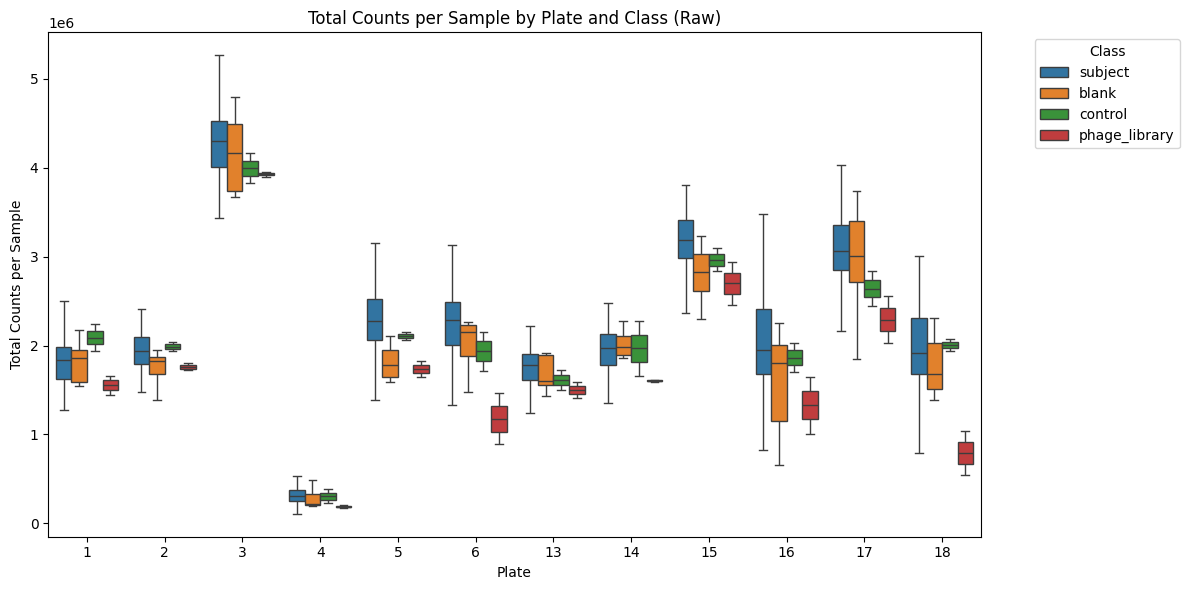

In [11]:
plot_total_counts(data_annot, "Total Counts per Sample by Plate and Class (Raw)")

In [12]:
data

id,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0,0,0,0,1,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,21
14078-01dup,0,26,0,0,0,0,0,0,0,0,...,72,0,0,10,57,4,0,0,0,2
14118-01,0,0,0,0,1,0,81,0,0,0,...,73,0,0,21,1,0,0,0,0,0
14118-01dup,0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,1,0,5,0,12,0
14127-01,0,161,0,0,0,0,0,0,0,0,...,65,0,1,0,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,0,30,0,0,18,0,19,0,0,1,...,3,0,0,2,13,4,0,0,1,2
E129145,0,3,0,0,12,0,22,1,0,3,...,1,0,0,6,5,0,1,1,1,4
E129145dup,0,9,0,0,11,0,20,2,0,1,...,0,0,1,11,12,2,8,2,1,5


In [13]:
sums=data.sum(axis='columns')
sums

sample
14078-01       1803049
14078-01dup    1449043
14118-01       1861045
14118-01dup    1836777
14127-01       1568392
                ...   
E097416dup     1971120
E129145        1909742
E129145dup     1754866
PLib18         1034184
PLib18dup       543435
Length: 1145, dtype: int64

In [14]:
n=data.div(sums,axis='index')*1000000
n

id,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0.0,0.000000,0.0,0.000000,0.554616,0.0,1.109232,0.000000,0.0,0.000000,...,0.000000,0.000000,0.554616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.646938
14078-01dup,0.0,17.942877,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,49.687966,0.000000,0.000000,6.901106,39.336307,2.760443,0.000000,0.000000,0.000000,1.380221
14118-01,0.0,0.000000,0.0,0.000000,0.537333,0.0,43.523934,0.000000,0.0,0.000000,...,39.225274,0.000000,0.000000,11.283983,0.537333,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,0.0,0.000000,0.0,0.000000,1.088864,0.0,0.544432,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.544432,0.000000,2.722160,0.000000,6.533183,0.000000
14127-01,0.0,102.652908,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,41.443721,0.000000,0.637596,0.000000,19.765467,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,0.0,15.219774,0.0,0.000000,9.131864,0.0,9.639190,0.000000,0.0,0.507326,...,1.521977,0.000000,0.000000,1.014652,6.595235,2.029303,0.000000,0.000000,0.507326,1.014652
E129145,0.0,1.570893,0.0,0.000000,6.283571,0.0,11.519881,0.523631,0.0,1.570893,...,0.523631,0.000000,0.000000,3.141786,2.618155,0.000000,0.523631,0.523631,0.523631,2.094524
E129145dup,0.0,5.128597,0.0,0.000000,6.268285,0.0,11.396882,1.139688,0.0,0.569844,...,0.000000,0.000000,0.569844,6.268285,6.838129,1.139688,4.558753,1.139688,0.569844,2.849220


In [15]:
n = manifest_index.join(n, how='left')
n = n.reset_index().set_index(['sample','subject','type']) #,'plate','class'])
n

,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.554616,0.0,1.109232,0.000000,...,0.000000,0.000000,0.554616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.646938
14078-01dup,14078-01,glioma serum,1,subject,0.0,17.942877,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,49.687966,0.000000,0.000000,6.901106,39.336307,2.760443,0.000000,0.000000,0.000000,1.380221
14118-01,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.537333,0.0,43.523934,0.000000,...,39.225274,0.000000,0.000000,11.283983,0.537333,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,1.088864,0.0,0.544432,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.544432,0.000000,2.722160,0.000000,6.533183,0.000000
14127-01,14127-01,glioma serum,1,subject,0.0,102.652908,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,41.443721,0.000000,0.637596,0.000000,19.765467,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,15.219774,0.0,0.000000,9.131864,0.0,9.639190,0.000000,...,1.521977,0.000000,0.000000,1.014652,6.595235,2.029303,0.000000,0.000000,0.507326,1.014652
E129145,E129145,glioma serum,18,subject,0.0,1.570893,0.0,0.000000,6.283571,0.0,11.519881,0.523631,...,0.523631,0.000000,0.000000,3.141786,2.618155,0.000000,0.523631,0.523631,0.523631,2.094524
E129145dup,E129145,glioma serum,18,subject,0.0,5.128597,0.0,0.000000,6.268285,0.0,11.396882,1.139688,...,0.000000,0.000000,0.569844,6.268285,6.838129,1.139688,4.558753,1.139688,0.569844,2.849220


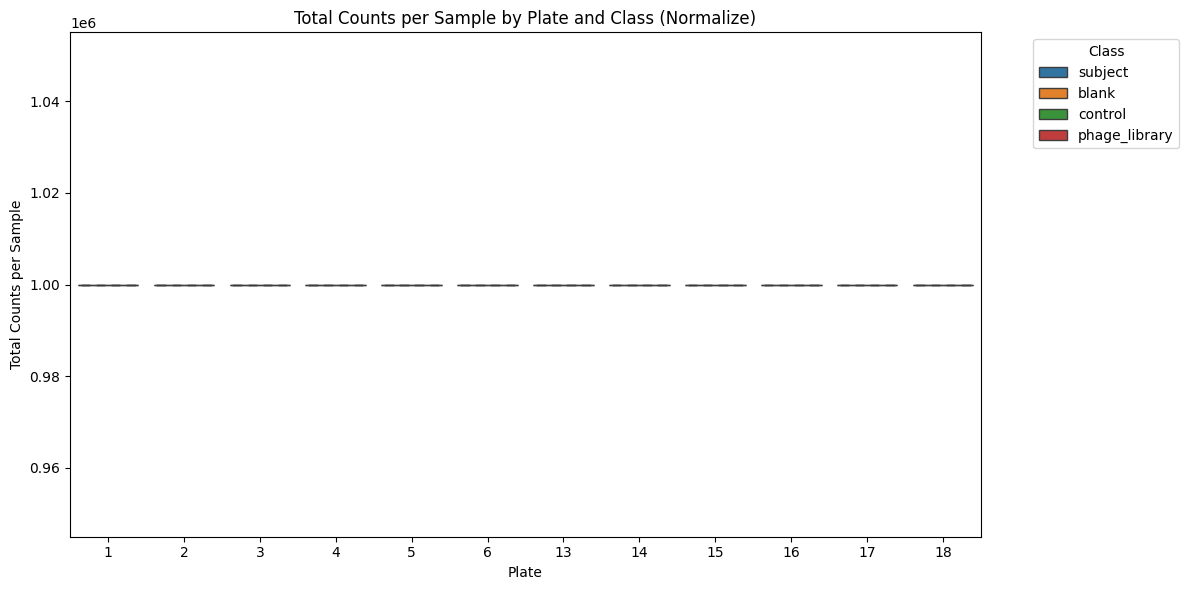

In [16]:
plot_total_counts(n, "Total Counts per Sample by Plate and Class (Normalize)")

In [17]:
n = n.reset_index().set_index(['sample','subject','type','plate','class'])
n

,,,,,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,plate,class,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.554616,0.0,1.109232,0.000000,0.0,0.000000,...,0.000000,0.000000,0.554616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.646938
14078-01dup,14078-01,glioma serum,1,subject,0.0,17.942877,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,49.687966,0.000000,0.000000,6.901106,39.336307,2.760443,0.000000,0.000000,0.000000,1.380221
14118-01,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.537333,0.0,43.523934,0.000000,0.0,0.000000,...,39.225274,0.000000,0.000000,11.283983,0.537333,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,1.088864,0.0,0.544432,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.544432,0.000000,2.722160,0.000000,6.533183,0.000000
14127-01,14127-01,glioma serum,1,subject,0.0,102.652908,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,41.443721,0.000000,0.637596,0.000000,19.765467,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,15.219774,0.0,0.000000,9.131864,0.0,9.639190,0.000000,0.0,0.507326,...,1.521977,0.000000,0.000000,1.014652,6.595235,2.029303,0.000000,0.000000,0.507326,1.014652
E129145,E129145,glioma serum,18,subject,0.0,1.570893,0.0,0.000000,6.283571,0.0,11.519881,0.523631,0.0,1.570893,...,0.523631,0.000000,0.000000,3.141786,2.618155,0.000000,0.523631,0.523631,0.523631,2.094524
E129145dup,E129145,glioma serum,18,subject,0.0,5.128597,0.0,0.000000,6.268285,0.0,11.396882,1.139688,0.0,0.569844,...,0.000000,0.000000,0.569844,6.268285,6.838129,1.139688,4.558753,1.139688,0.569844,2.849220


In [18]:
ss=[]
for plate in n.index.get_level_values('plate').unique():
  a = n.loc[(n.index.get_level_values('plate') == plate),:]
  ss.append(
    a.sub(
      a.loc[(a.index.get_level_values('type') == 'input'),:].median(axis='index'), axis='columns').clip(lower=0)
  )

s=pd.concat(ss, axis='index')  #,axis=1)
s=s.sort_index(axis=1)
s=s.fillna(0)
s

,,,,,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,plate,class,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.554616,0.0,1.109232,0.000000,0.0,0.000000,...,0.000000,0.000000,0.554616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.646938
14078-01dup,14078-01,glioma serum,1,subject,0.0,17.942877,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,49.687966,0.000000,0.000000,6.901106,39.336307,2.760443,0.000000,0.000000,0.000000,1.380221
14118-01,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.537333,0.0,43.523934,0.000000,0.0,0.000000,...,39.225274,0.000000,0.000000,11.283983,0.537333,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,1.088864,0.0,0.544432,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.544432,0.000000,2.722160,0.000000,6.533183,0.000000
14127-01,14127-01,glioma serum,1,subject,0.0,102.652908,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,41.443721,0.000000,0.637596,0.000000,19.765467,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.929058,0.000000,0.0,0.507326,...,1.521977,0.000000,0.000000,0.000000,0.000000,2.029303,0.000000,0.000000,0.000000,0.762939
E129145,E129145,glioma serum,18,subject,0.0,0.000000,0.0,0.000000,0.000000,0.0,3.809749,0.523631,0.0,1.570893,...,0.523631,0.000000,0.000000,1.637900,0.000000,0.000000,0.523631,0.000000,0.000000,1.842811
E129145dup,E129145,glioma serum,18,subject,0.0,0.000000,0.0,0.000000,0.000000,0.0,3.686749,1.139688,0.0,0.569844,...,0.000000,0.000000,0.569844,4.764399,0.000000,1.139688,4.558753,0.000000,0.000000,2.597508


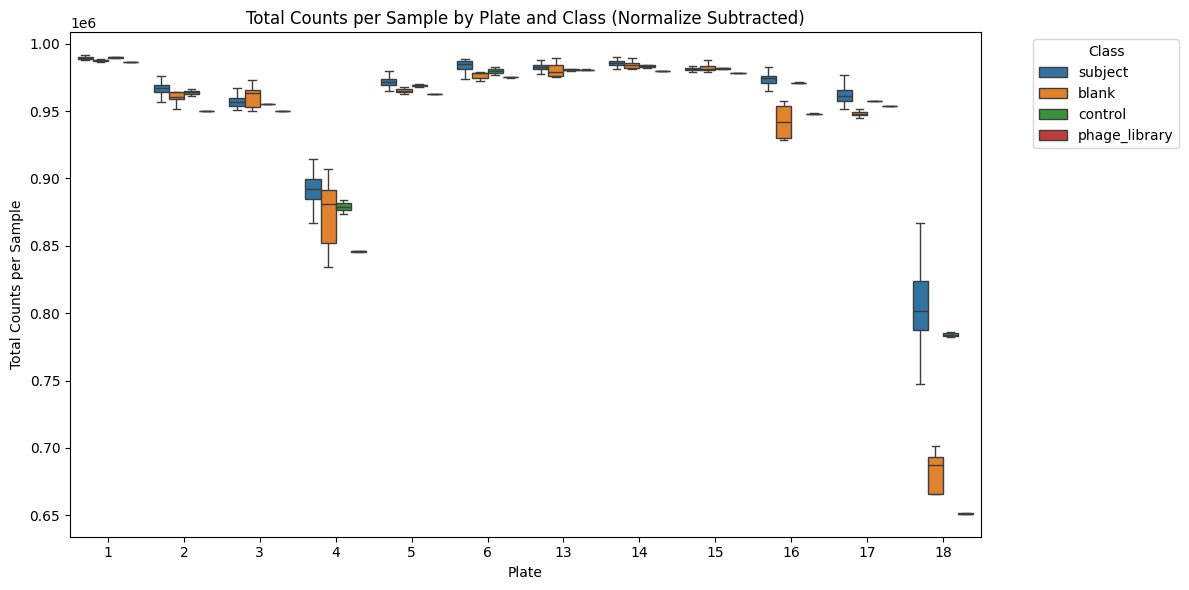

In [19]:
s = s.reset_index().set_index(['sample','subject','type']) #,'plate','class'])
plot_total_counts(s, "Total Counts per Sample by Plate and Class (Normalize Subtracted)")

In [20]:
#data_annot = s.copy().fillna(0)
#data_annot = data_annot.reset_index().drop(['type','plate','class'],axis='columns').set_index('sample')
data_annot

,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
14078-01dup,14078-01,glioma serum,1,subject,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,0.0,0.0,10.0,57.0,4.0,0.0,0.0,0.0,2.0
14118-01,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,...,73.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,12.0,0.0
14127-01,14127-01,glioma serum,1,subject,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,0.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,30.0,0.0,0.0,18.0,0.0,19.0,0.0,...,3.0,0.0,0.0,2.0,13.0,4.0,0.0,0.0,1.0,2.0
E129145,E129145,glioma serum,18,subject,0.0,3.0,0.0,0.0,12.0,0.0,22.0,1.0,...,1.0,0.0,0.0,6.0,5.0,0.0,1.0,1.0,1.0,4.0
E129145dup,E129145,glioma serum,18,subject,0.0,9.0,0.0,0.0,11.0,0.0,20.0,2.0,...,0.0,0.0,1.0,11.0,12.0,2.0,8.0,2.0,1.0,5.0


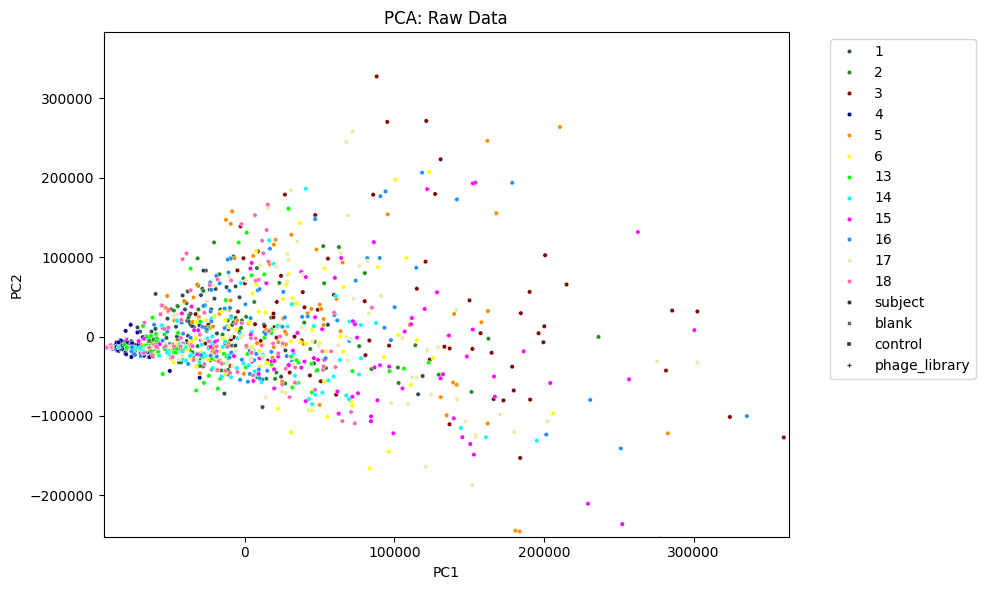

In [21]:
# PCA plots for each step
plot_pca(data_annot.reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0), "PCA: Raw Data")

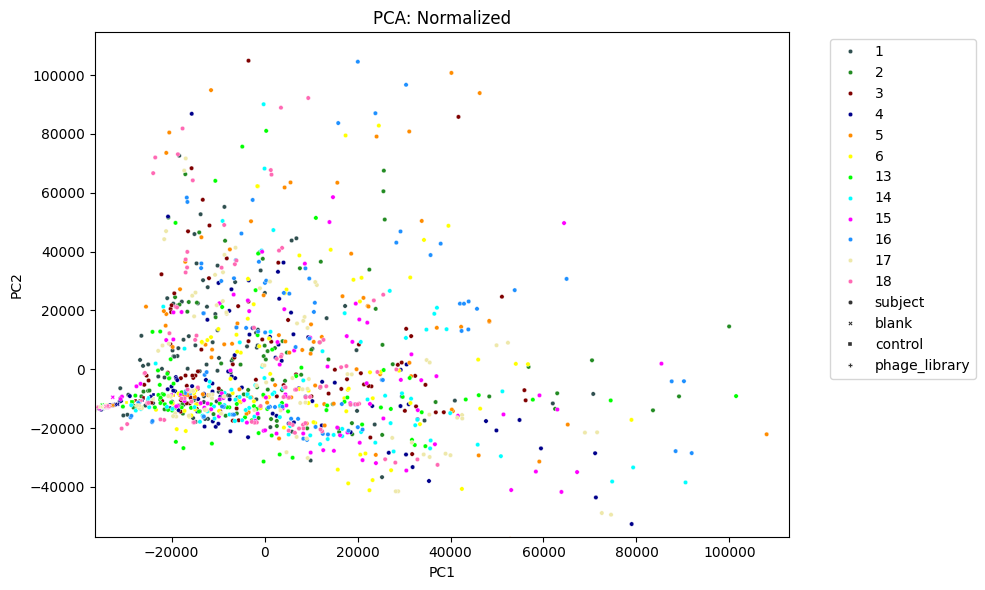

In [22]:
plot_pca(n.reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0), "PCA: Normalized")

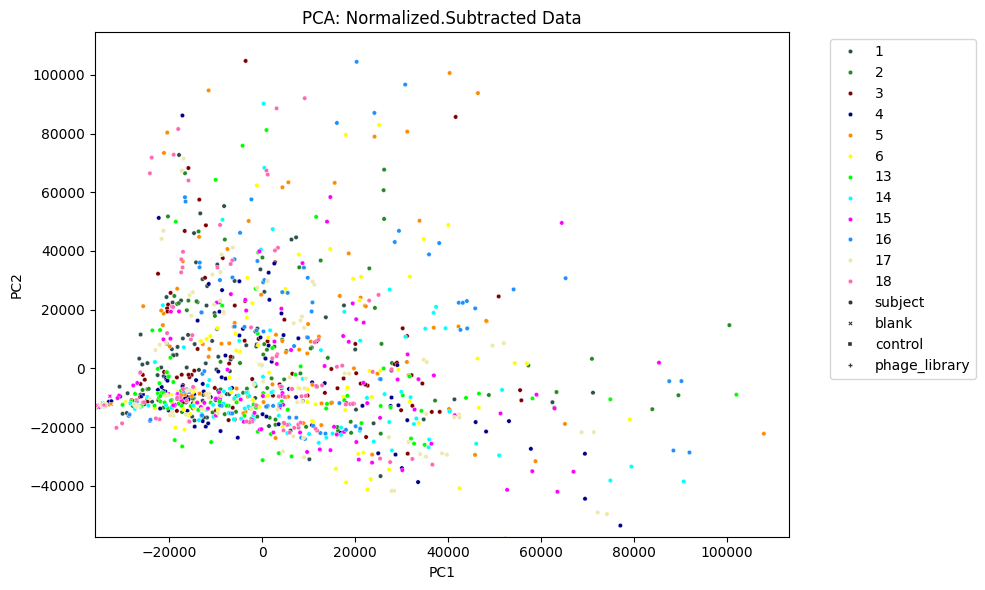

In [23]:
plot_pca(s.reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0), "PCA: Normalized.Subtracted Data")

In [24]:
cse_pca_data_annot = data_annot.loc[
    (data_annot.index.get_level_values('type') == 'commercial serum control'),:
    ].reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0)
cse_pca_data_annot

,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
CSE01_1,1,control,0.0,0.0,0.0,0.0,436.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
CSE01_2,1,control,0.0,0.0,0.0,0.0,258.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
CSE02_1,2,control,0.0,34.0,0.0,0.0,695.0,0.0,12.0,0.0,...,1.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0
CSE02_2,2,control,0.0,16.0,0.0,0.0,839.0,0.0,0.0,0.0,...,3.0,0.0,2.0,12.0,6.0,43.0,0.0,2.0,0.0,6.0
CSE03,3,control,0.0,39.0,0.0,20.0,1305.0,0.0,4.0,24.0,...,14.0,0.0,6.0,46.0,1.0,0.0,0.0,0.0,0.0,9.0
CSE03dup,3,control,0.0,0.0,0.0,22.0,2269.0,0.0,71.0,17.0,...,0.0,0.0,1.0,22.0,22.0,1.0,3.0,5.0,74.0,0.0
CSE04,4,control,0.0,0.0,0.0,0.0,215.0,0.0,3.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
CSE04dup,4,control,0.0,0.0,0.0,0.0,130.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,1.0,0.0
CSE05,5,control,0.0,2.0,0.0,0.0,775.0,0.0,1.0,0.0,...,0.0,8.0,6.0,59.0,1.0,0.0,20.0,5.0,27.0,0.0


In [25]:
cse_pca_n = n.loc[
    (n.index.get_level_values('type') == 'commercial serum control'),:
    ].reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0)
cse_pca_n

,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
CSE01_1,1,control,0.0,0.000000,0.0,0.000000,194.706224,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.591756
CSE01_2,1,control,0.0,0.000000,0.0,0.000000,132.895979,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,51.510069,0.000000,0.000000,0.000000,0.000000,0.000000
CSE02_1,2,control,0.0,17.534369,0.0,0.000000,358.423124,0.0,6.188601,0.000000,...,0.515717,0.000000,0.000000,1.031433,5.157167,0.000000,0.000000,0.000000,0.000000,0.000000
CSE02_2,2,control,0.0,7.854091,0.0,0.000000,411.848877,0.0,0.000000,0.000000,...,1.472642,0.000000,0.981761,5.890568,2.945284,21.107869,0.000000,0.981761,0.000000,2.945284
CSE03,3,control,0.0,10.184509,0.0,5.222825,340.789352,0.0,1.044565,6.267390,...,3.655978,0.000000,1.566848,12.012498,0.261141,0.000000,0.000000,0.000000,0.000000,2.350271
CSE03dup,3,control,0.0,0.000000,0.0,5.285692,545.147014,0.0,17.058368,4.084398,...,0.000000,0.000000,0.240259,5.285692,5.285692,0.240259,0.720776,1.201294,17.779145,0.000000
CSE04,4,control,0.0,0.000000,0.0,0.000000,563.015880,0.0,7.856036,0.000000,...,0.000000,5.237357,0.000000,2.618679,0.000000,0.000000,0.000000,0.000000,0.000000,2.618679
CSE04dup,4,control,0.0,0.000000,0.0,0.000000,565.965450,0.0,4.353580,8.707161,...,4.353580,0.000000,0.000000,0.000000,4.353580,0.000000,52.242965,0.000000,4.353580,0.000000
CSE05,5,control,0.0,0.967295,0.0,0.000000,374.826915,0.0,0.483648,0.000000,...,0.000000,3.869181,2.901886,28.535210,0.483648,0.000000,9.672953,2.418238,13.058486,0.000000


In [26]:
cse_pca_s = s.loc[
    (s.index.get_level_values('type') == 'commercial serum control'),:
    ].reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0)
cse_pca_s

,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
CSE01_1,1,control,0.0,0.000000,0.0,0.000000,194.706224,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.591756
CSE01_2,1,control,0.0,0.000000,0.0,0.000000,132.895979,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,51.510069,0.000000,0.000000,0.000000,0.000000,0.000000
CSE02_1,2,control,0.0,17.534369,0.0,0.000000,357.612216,0.0,5.922553,0.000000,...,0.515717,0.000000,0.000000,0.763547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CSE02_2,2,control,0.0,7.854091,0.0,0.000000,411.037970,0.0,0.000000,0.000000,...,1.472642,0.000000,0.981761,5.622682,0.000000,21.107869,0.000000,0.981761,0.000000,2.945284
CSE03,3,control,0.0,10.078538,0.0,5.222825,340.209157,0.0,0.000000,6.267390,...,3.551628,0.000000,1.446586,11.560033,0.000000,0.000000,0.000000,0.000000,0.000000,2.237047
CSE03dup,3,control,0.0,0.000000,0.0,5.285692,544.566820,0.0,9.099731,4.084398,...,0.000000,0.000000,0.119997,4.833227,4.791946,0.240259,0.720776,1.201294,17.541145,0.000000
CSE04,4,control,0.0,0.000000,0.0,0.000000,555.554218,0.0,5.816335,0.000000,...,0.000000,5.237357,0.000000,2.618679,0.000000,0.000000,0.000000,0.000000,0.000000,2.618679
CSE04dup,4,control,0.0,0.000000,0.0,0.000000,558.503788,0.0,2.313880,8.707161,...,4.353580,0.000000,0.000000,0.000000,4.353580,0.000000,52.242965,0.000000,4.353580,0.000000
CSE05,5,control,0.0,0.730610,0.0,0.000000,374.040102,0.0,0.000000,0.000000,...,0.000000,3.869181,2.901886,28.535210,0.000000,0.000000,9.672953,2.418238,13.058486,0.000000


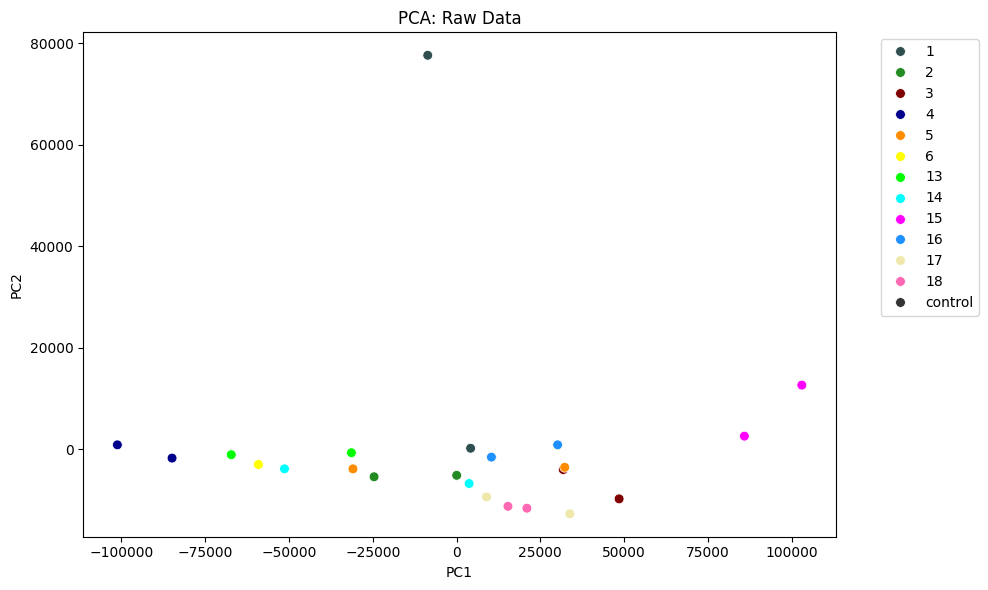

In [27]:
plot_pca(cse_pca_data_annot, "PCA: Raw Data",min=0,max=100,size=50)

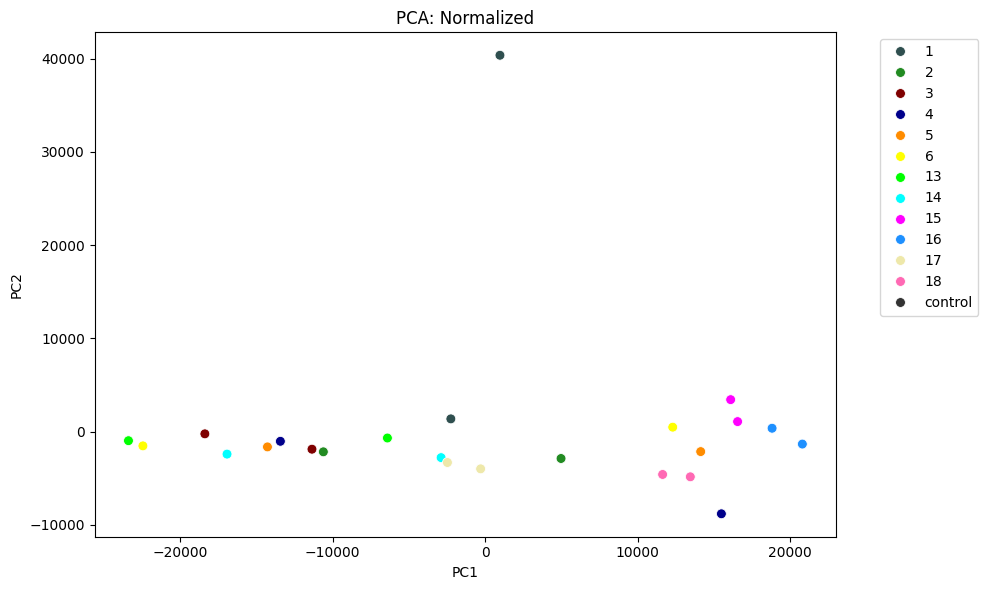

In [28]:
plot_pca(cse_pca_n,"PCA: Normalized",min=0,max=100,size=50)

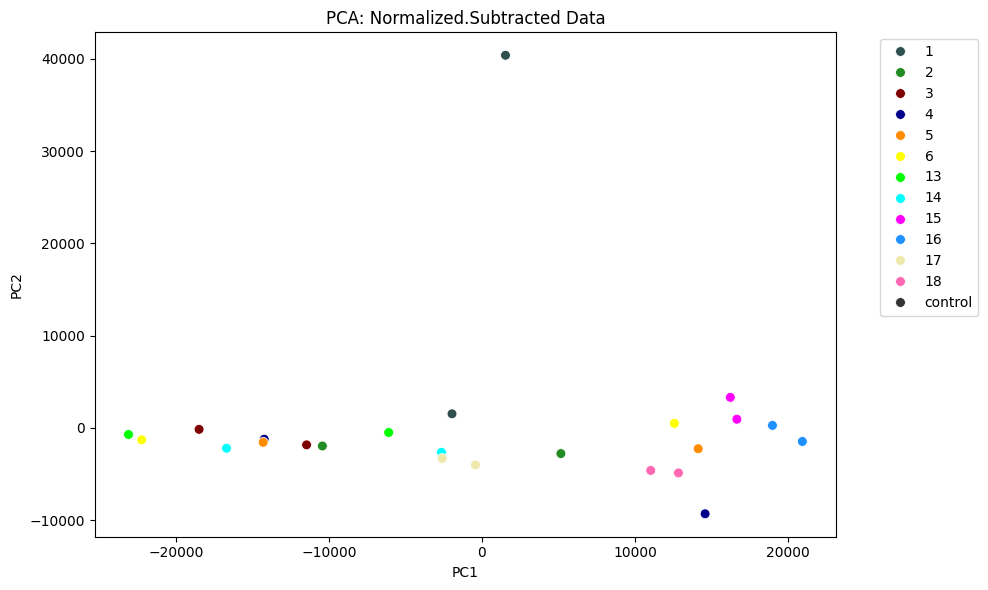

In [29]:
plot_pca(cse_pca_s, "PCA: Normalized.Subtracted Data",min=0,max=100,size=50)

In [30]:
cse_pca_data_annot_corr = cse_pca_data_annot.drop(['plate','class'],axis='columns').T.corr()
cse_pca_data_annot_corr

sample,CSE01_1,CSE01_2,CSE02_1,CSE02_2,CSE03,CSE03dup,CSE04,CSE04dup,CSE05,CSE05dup,...,CSE14_1,CSE14_2,CSE15,CSE15dup,CSE16,CSE16dup,CSE17,CSE17dup,CSE18,CSE18dup
sample,,,,,,,,,,,,,,,,,,,,,
CSE01_1,1.000000,0.720786,0.875833,0.868926,0.882077,0.885058,0.830645,0.894535,0.875833,0.883427,...,0.875608,0.870003,0.871115,0.859766,0.861446,0.852595,0.864523,0.866046,0.895821,0.896833
CSE01_2,0.720786,1.000000,0.749624,0.734832,0.739053,0.754648,0.701351,0.760681,0.736933,0.757541,...,0.725880,0.724879,0.790060,0.765958,0.776934,0.765679,0.740750,0.746126,0.739054,0.740272
CSE02_1,0.875833,0.749624,1.000000,0.946064,0.953874,0.923836,0.943490,0.952898,0.946365,0.971542,...,0.964409,0.948533,0.947507,0.927491,0.950930,0.947996,0.956933,0.955558,0.945010,0.945157
CSE02_2,0.868926,0.734832,0.946064,1.000000,0.951896,0.948276,0.908182,0.941992,0.955751,0.949128,...,0.949290,0.924622,0.934873,0.945630,0.944057,0.941116,0.946709,0.948635,0.947335,0.949311
CSE03,0.882077,0.739053,0.953874,0.951896,1.000000,0.961278,0.923870,0.939242,0.955893,0.963229,...,0.946484,0.941349,0.953882,0.949979,0.943773,0.943944,0.941315,0.941753,0.943041,0.943798
CSE03dup,0.885058,0.754648,0.923836,0.948276,0.961278,1.000000,0.913295,0.941691,0.945749,0.943967,...,0.930648,0.913338,0.935363,0.939186,0.940254,0.942441,0.935487,0.938169,0.939408,0.941100
CSE04,0.830645,0.701351,0.943490,0.908182,0.923870,0.913295,1.000000,0.953706,0.913994,0.942695,...,0.923250,0.912539,0.911843,0.901539,0.926620,0.941334,0.953233,0.947270,0.931498,0.931308
CSE04dup,0.894535,0.760681,0.952898,0.941992,0.939242,0.941691,0.953706,1.000000,0.938564,0.954768,...,0.949034,0.932906,0.942964,0.928767,0.940900,0.943256,0.957835,0.956308,0.951155,0.952582
CSE05,0.875833,0.736933,0.946365,0.955751,0.955893,0.945749,0.913994,0.938564,1.000000,0.958490,...,0.953876,0.926371,0.939580,0.940704,0.933429,0.931551,0.935946,0.936604,0.938684,0.939477


In [31]:
cse_pca_n_corr = cse_pca_n.drop(['plate','class'],axis='columns').T.corr()
cse_pca_n_corr

sample,CSE01_1,CSE01_2,CSE02_1,CSE02_2,CSE03,CSE03dup,CSE04,CSE04dup,CSE05,CSE05dup,...,CSE14_1,CSE14_2,CSE15,CSE15dup,CSE16,CSE16dup,CSE17,CSE17dup,CSE18,CSE18dup
sample,,,,,,,,,,,,,,,,,,,,,
CSE01_1,1.000000,0.720786,0.875833,0.868926,0.882077,0.885058,0.830645,0.894535,0.875833,0.883427,...,0.875608,0.870003,0.871115,0.859766,0.861446,0.852595,0.864523,0.866046,0.895821,0.896833
CSE01_2,0.720786,1.000000,0.749624,0.734832,0.739053,0.754648,0.701351,0.760681,0.736933,0.757541,...,0.725880,0.724879,0.790060,0.765958,0.776934,0.765679,0.740750,0.746126,0.739054,0.740272
CSE02_1,0.875833,0.749624,1.000000,0.946064,0.953874,0.923836,0.943490,0.952898,0.946365,0.971542,...,0.964409,0.948533,0.947507,0.927491,0.950930,0.947996,0.956933,0.955558,0.945010,0.945157
CSE02_2,0.868926,0.734832,0.946064,1.000000,0.951896,0.948276,0.908182,0.941992,0.955751,0.949128,...,0.949290,0.924622,0.934873,0.945630,0.944057,0.941116,0.946709,0.948635,0.947335,0.949311
CSE03,0.882077,0.739053,0.953874,0.951896,1.000000,0.961278,0.923870,0.939242,0.955893,0.963229,...,0.946484,0.941349,0.953882,0.949979,0.943773,0.943944,0.941315,0.941753,0.943041,0.943798
CSE03dup,0.885058,0.754648,0.923836,0.948276,0.961278,1.000000,0.913295,0.941691,0.945749,0.943967,...,0.930648,0.913338,0.935363,0.939186,0.940254,0.942441,0.935487,0.938169,0.939408,0.941100
CSE04,0.830645,0.701351,0.943490,0.908182,0.923870,0.913295,1.000000,0.953706,0.913994,0.942695,...,0.923250,0.912539,0.911843,0.901539,0.926620,0.941334,0.953233,0.947270,0.931498,0.931308
CSE04dup,0.894535,0.760681,0.952898,0.941992,0.939242,0.941691,0.953706,1.000000,0.938564,0.954768,...,0.949034,0.932906,0.942964,0.928767,0.940900,0.943256,0.957835,0.956308,0.951155,0.952582
CSE05,0.875833,0.736933,0.946365,0.955751,0.955893,0.945749,0.913994,0.938564,1.000000,0.958490,...,0.953876,0.926371,0.939580,0.940704,0.933429,0.931551,0.935946,0.936604,0.938684,0.939477


In [32]:
cse_pca_s_corr = cse_pca_s.drop(['plate','class'],axis='columns').T.corr()
cse_pca_s_corr

sample,CSE01_1,CSE01_2,CSE02_1,CSE02_2,CSE03,CSE03dup,CSE04,CSE04dup,CSE05,CSE05dup,...,CSE14_1,CSE14_2,CSE15,CSE15dup,CSE16,CSE16dup,CSE17,CSE17dup,CSE18,CSE18dup
sample,,,,,,,,,,,,,,,,,,,,,
CSE01_1,1.000000,0.718870,0.874982,0.868164,0.881256,0.884321,0.826980,0.894873,0.874449,0.882494,...,0.874536,0.868997,0.870265,0.858663,0.860245,0.851260,0.862970,0.864582,0.893998,0.895036
CSE01_2,0.718870,1.000000,0.747856,0.732744,0.734623,0.749853,0.693831,0.753400,0.732423,0.754833,...,0.723147,0.722696,0.788119,0.763656,0.774946,0.763562,0.737199,0.742621,0.736035,0.737252
CSE02_1,0.874982,0.747856,1.000000,0.945389,0.953240,0.922134,0.940206,0.951623,0.945188,0.971542,...,0.963805,0.947815,0.947446,0.927017,0.950480,0.947485,0.955783,0.954418,0.943261,0.943408
CSE02_2,0.868164,0.732744,0.945389,1.000000,0.951715,0.947684,0.904784,0.941466,0.955086,0.948975,...,0.948510,0.923600,0.934906,0.945738,0.943570,0.940596,0.945468,0.947451,0.944823,0.946813
CSE03,0.881256,0.734623,0.953240,0.951715,1.000000,0.960057,0.920690,0.936327,0.954583,0.962294,...,0.945353,0.940553,0.952842,0.949316,0.942309,0.942743,0.940177,0.940552,0.941467,0.942147
CSE03dup,0.884321,0.749853,0.922134,0.947684,0.960057,1.000000,0.909843,0.938710,0.944302,0.942495,...,0.929047,0.911891,0.933800,0.938361,0.938555,0.941121,0.934091,0.936744,0.937238,0.938835
CSE04,0.826980,0.693831,0.940206,0.904784,0.920690,0.909843,1.000000,0.953680,0.911001,0.939876,...,0.919655,0.909347,0.908234,0.898402,0.922841,0.938278,0.951193,0.944997,0.929951,0.929677
CSE04dup,0.894873,0.753400,0.951623,0.941466,0.936327,0.938710,0.953680,1.000000,0.937148,0.953420,...,0.947348,0.932058,0.941130,0.927909,0.938241,0.941526,0.957146,0.955260,0.953259,0.954539
CSE05,0.874449,0.732423,0.945188,0.955086,0.954583,0.944302,0.911001,0.937148,1.000000,0.957318,...,0.952905,0.925172,0.937976,0.939427,0.931314,0.929662,0.934416,0.935061,0.936421,0.937137


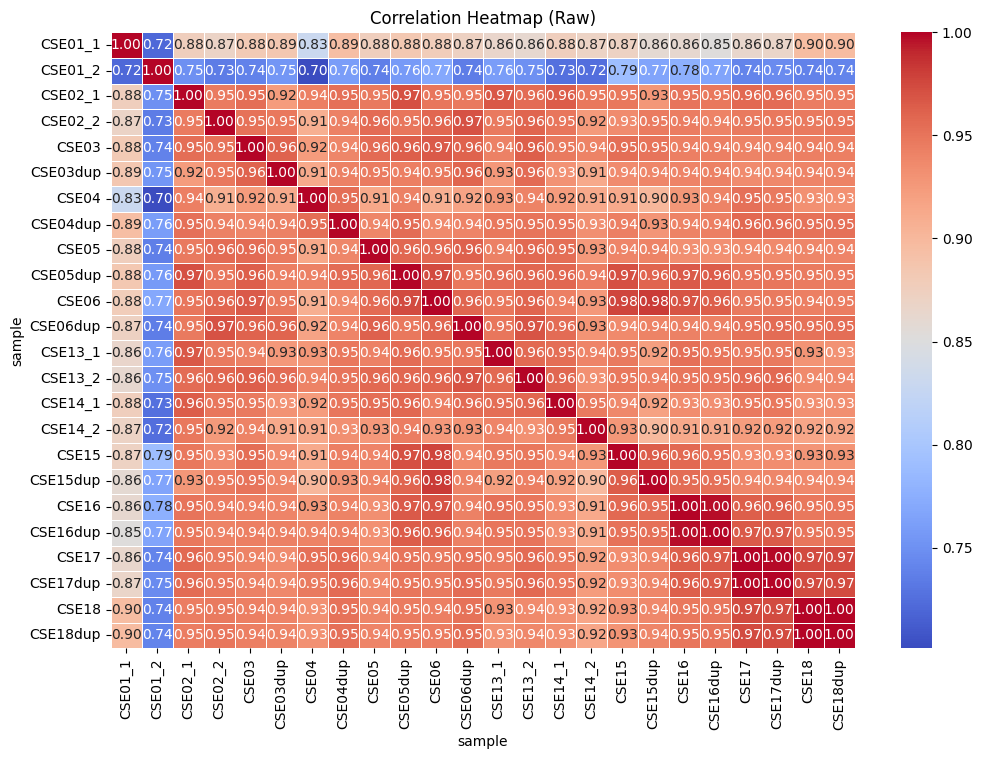

In [33]:
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.heatmap(cse_pca_data_annot_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Raw)')
plt.show()

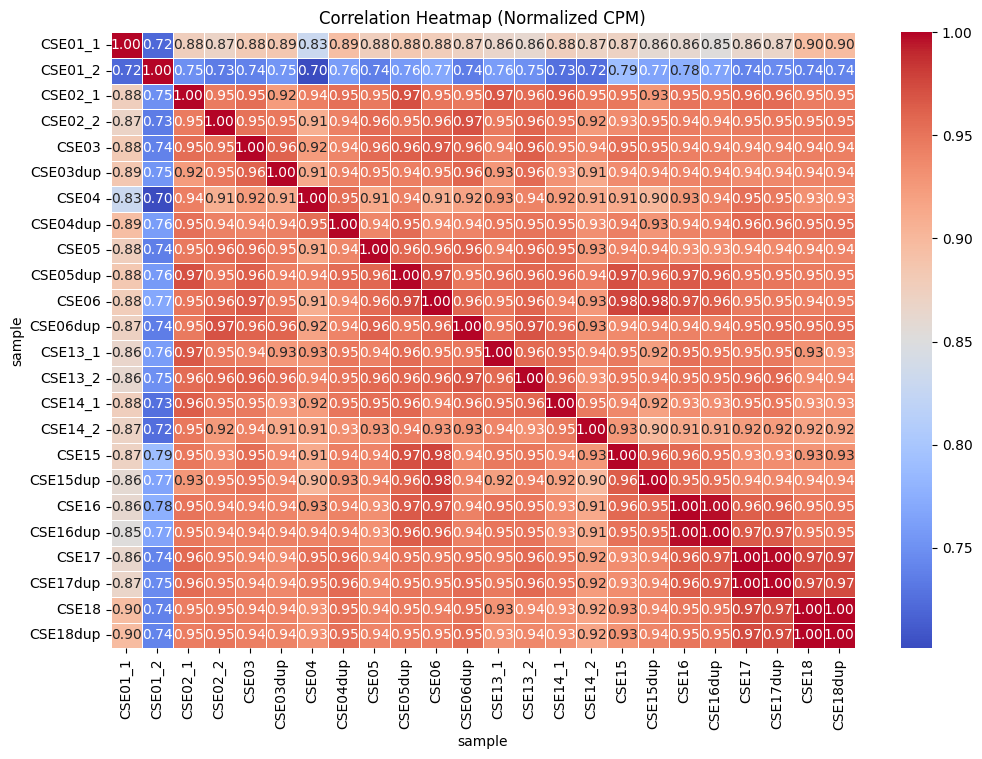

In [34]:
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.heatmap(cse_pca_n_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Normalized CPM)')
plt.show()

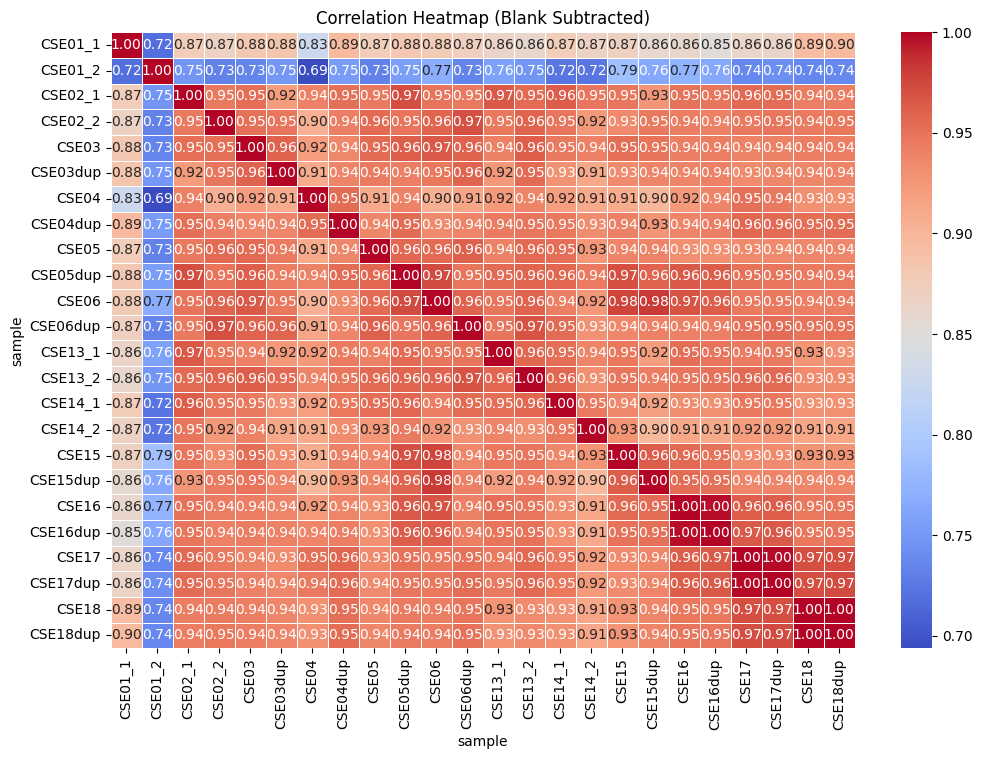

In [35]:
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.heatmap(cse_pca_s_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Blank Subtracted)')
plt.show()